In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt.

In [2]:
df= pd.read_csv("F:/null class/Project/Final_dataset_of_job_descriptions.csv")

In [3]:
df.isnull().sum()

Job_Id              0
Experience          0
Qualifications      0
Salary_Range        0
location            0
Country             0
latitude            0
longitude           0
Work_Type           0
Company_Size        0
Job_Posting_Date    0
Preference          0
Contact_Person      0
Contact             0
Job_Title           0
Role                0
Job_Portal          0
Job_Description     0
Benefits            0
skills              0
Responsibilities    0
Company             0
Company_Profile     0
dtype: int64

In [4]:
df.head(3)

,Job_Id,Experience,Qualifications,Salary_Range,location,Country,latitude,longitude,Work_Type,Company_Size,...,Contact,Job_Title,Role,Job_Portal,Job_Description,Benefits,skills,Responsibilities,Company,Company_Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."


In [5]:
def extract_experience(experience_str):
    try:
        experience_str = experience_str.replace('Years', '').strip()
        lower, upper = experience_str.split('to')
        
        lower = int(lower.strip())
        upper = int(upper.strip())
        return (lower + upper) / 2
    except:
        return None 
df['Experience_Numeric'] = df['Experience'].apply(extract_experience)

In [6]:
def parse_salary(salary_range):
    try:
        salary_range = salary_range.replace('$', '').strip()
        if '-' in salary_range:
            lower, upper = salary_range.split('-')
            lower = int(lower.replace('K', '').replace(',', '').strip()) * 1000
            upper = int(upper.replace('K', '').replace(',', '').strip()) * 1000
            return (lower + upper) / 2  
        else:
            return int(salary_range.replace('K', '').replace(',', '').strip()) * 1000
    except:
        return None 
    
df['Salary_Numeric'] = df['Salary_Range'].apply(parse_salary)

1. Draw a chart between company size and company name where company size<50000 and job title should be mechanical engineer and experience should be more than 5 years and country should be Asian as well as salary should be more than $50k and the work type should be both part time and full time and ignore all other work types and the preference should be male .we should filter candidates those who are applied on idealist and this chart should work on only between 3 Pm to 6 Pm.

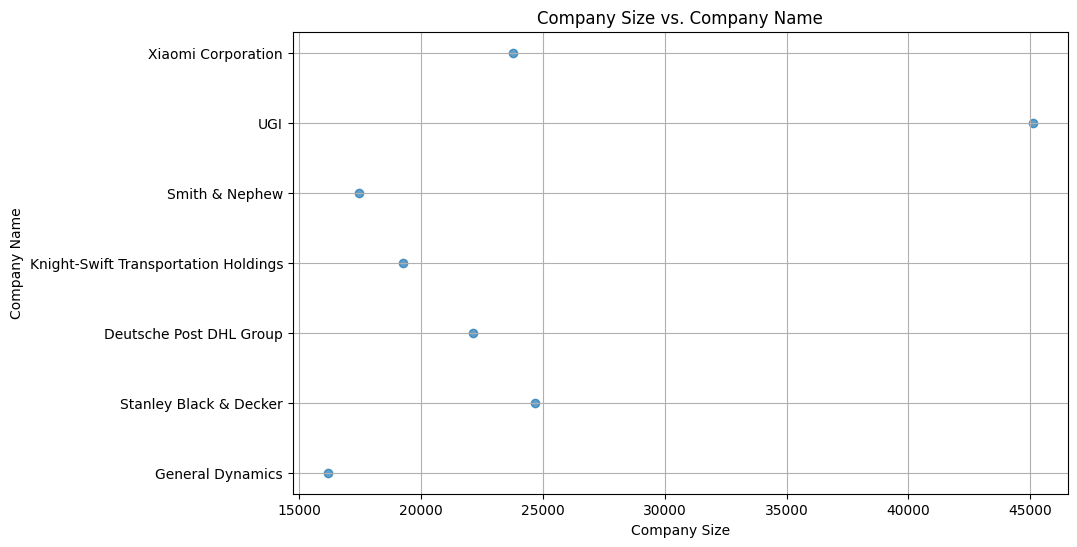

In [7]:
df_filtered = df[
    (df['Company_Size'] < 50000) &
    (df['Job_Title'] == 'Mechanical Engineer') &
    (df['Experience_Numeric'] > 5) &
    (df['Country'].isin(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 
                         'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 
                         'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lao Pdr', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
                           'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 
                           'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 
                           'UAE', 'Uzbekistan', 'Vietnam', 'Yemen'])) &  
    (df['Salary_Numeric'] > 50000) &
    (df['Work_Type'].isin(['Part-Time', 'Full-Time'])) &
    (df['Preference'] == 'Male') &
    (df['Job_Portal'] == 'Idealist')
]


plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Company_Size'], df_filtered['Company'], alpha=0.7)
plt.xlabel('Company Size')
plt.ylabel('Company Name')
plt.title('Company Size vs. Company Name')
plt.grid(True)
plt.show()

2. Draw a chart for top 10 companies who have max Data Engineer as Role and Data scientist as Job title and the country name should not have any Asian countries and preference should be female only .we should ignore the countries which starting with letter ‘C’ and latitude is below 10. The job posting date should be between 01/01/2023 to 06/01/2023. The qualification should be B.Tech and we should ignore other qualifications.

C:\Users\user\AppData\Local\Temp\ipykernel_11408\3802212076.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['Job_Posting_Date'] = pd.to_datetime(df_filtered1['Job_Posting_Date'])


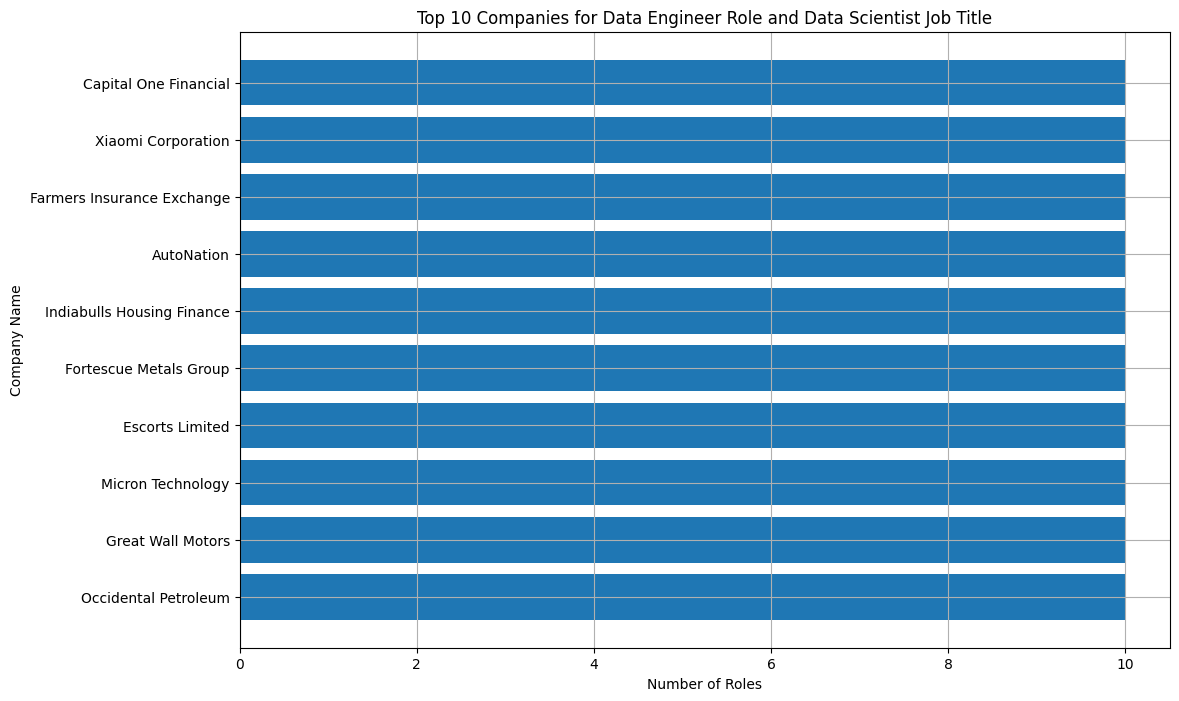

In [15]:
df_filtered1 = df[
    (df['Role'] == 'Data Engineer') &
    (df['Job_Title'] == 'Data Scientist') &
    (~df['Country'].isin(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 
                         'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 
                         'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lao Pdr', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
                           'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 
                           'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 
                           'UAE', 'Uzbekistan', 'Vietnam', 'Yemen'])) &
    (~df['Country'].str.startswith('C')) &
    (df['latitude'] >= 10) &
    (df['Preference'] == 'Female') &
    (df['Qualifications'].str.contains('B.Tech', case=False, na=False))  
]

df_filtered1['Job_Posting_Date'] = pd.to_datetime(df_filtered1['Job_Posting_Date'])
df_filtered1 = df_filtered1[
    (df_filtered1['Job_Posting_Date'] >= '2023-01-01') &
    (df_filtered1['Job_Posting_Date'] <= '2023-06-01')
]

top_companies = df_filtered1['Company'].value_counts().head(10).index
df_top_10 = df_filtered1[df_filtered1['Company'].isin(top_companies)]

plt.figure(figsize=(12, 8))
plt.barh(df_top_10['Company'], df_top_10['Role'].value_counts())
plt.xlabel('Number of Roles')
plt.ylabel('Company Name')
plt.title('Top 10 Companies for Data Engineer Role and Data Scientist Job Title')
plt.grid(True)
plt.show()

3. Draw a chart where country=’india and Germany ’ ,qualification=’B.tech’ and work type=’Full time’ where experience should be more than 2 years and job should be Data Science and salary range should be more than $10k . The india details should be on orange color and Germany details should be on green color . The job portal should be indeed and preference should be female . The job posting date should be below 08/01/2023 and jon portal should be indeed . This chart should swap color after 12 PM to 6 PM .

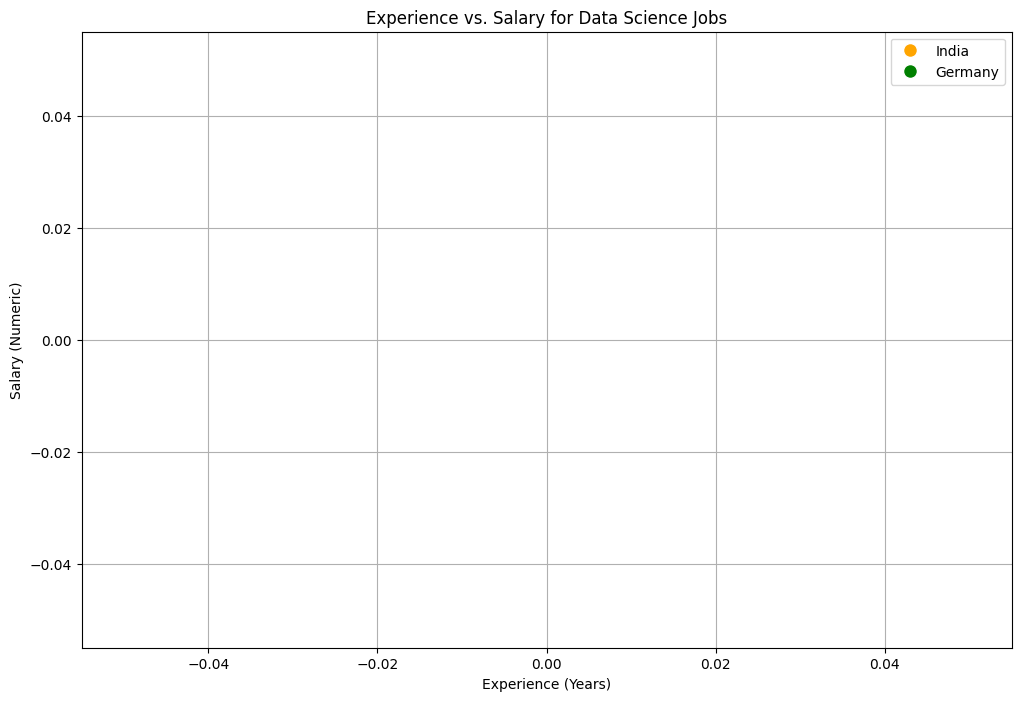

In [35]:
df_filtered2 = df[
    (df['Country'].isin(['India', 'Germany'])) &
    (df['Qualifications'].str.contains('B.Tech', case=False, na=False)) &
    (df['Work_Type'] == 'Full-Time') &
    (df['Experience_Numeric'] > 2) &
    (df['Job_Title'] == 'Data Scientist') &
    (df['Salary_Numeric'] > 10000) &
    (df['Preference'] == 'Female') &
    (df['Job_Portal'] == 'Indeed')
]

df_filtered2['Job_Posting_Date'] = pd.to_datetime(df_filtered2['Job_Posting_Date'])
df_filtered2 = df_filtered2[df_filtered2['Job_Posting_Date'] < '2023-08-01']

colors = {'India': 'orange', 'Germany': 'green'}
df_filtered2['Color'] = df_filtered2['Country'].map(colors)

plt.figure(figsize=(12, 8))
plt.scatter(df_filtered2['Experience_Numeric'], df_filtered2['Salary_Numeric'], 
            c=df_filtered2['Color'], alpha=0.7, label=df_filtered2['Country'])
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (Numeric)')
plt.title('Experience vs. Salary for Data Science Jobs')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='India'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Germany')],
           loc='upper right')
plt.grid(True)
plt.show()